Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBOVESPA (Bolsa de valores) para criar uma série temporal e prever diariamente o fechamento da base.

Para isso utilize a base de dados contida no site da investing e selecione o período “diário”, com o intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:
 1. O modelo com o storytelling, desde a captura do dado até a entrega do modelo;
 2. Justificar a técnica utilizada;
 3. Atingir uma acuracidade adequada (acima de 70%).

#Import das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install statsforecast
from statsmodels.tsa.stattools import adfuller
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive,SeasonalWindowAverage,AutoARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet as pr

#import dos dados e transformação

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FIAP/Fase 2/Tech Challenge/Dados Históricos - Ibovespa.csv")
df.head()

In [69]:
for i in range(len(df['Data'])):
    df['Data'][i] = df['Data'][i].replace(".", "-")

<ipython-input-69-af88740c8fcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'][i] = df['Data'][i].replace(".", "-")


In [70]:
df.Data= pd.to_datetime(df.Data, format="%d-%m-%Y")

In [71]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2021-03-11,114.984,112.782,115.127,112.776,"12,09M","1,96%"
1,2021-03-10,112.776,111.331,112.928,109.999,"12,51M","1,30%"
2,2021-03-09,111.331,110.611,112.525,109.343,"12,14M","0,65%"
3,2021-03-08,110.612,115.202,115.202,110.268,"13,70M","-3,98%"
4,2021-03-05,115.202,112.690,115.504,112.504,"13,25M","2,23%"


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      4999 non-null   datetime64[ns]
 1   Último    4999 non-null   float64       
 2   Abertura  4999 non-null   float64       
 3   Máxima    4999 non-null   float64       
 4   Mínima    4999 non-null   float64       
 5   Vol.      4998 non-null   object        
 6   Var%      4999 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 273.5+ KB


In [73]:
df.shape

(4999, 7)

In [74]:
df.describe()

,Último,Abertura,Máxima,Mínima
count,4999.000000,4999.000000,4999.000000,4999.000000
mean,52.332467,52.313602,52.867315,51.767294
std,26.168266,26.157799,26.384225,25.933473
min,8.371000,8.397000,8.513000,8.225000
25%,33.510000,33.484500,33.804000,33.166500
50%,53.875000,53.865000,54.385000,53.257000
75%,65.974000,65.955000,66.583000,65.354000
max,125.077000,125.075000,125.324000,123.227000


In [75]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2021-03-11,114.984,112.782,115.127,112.776,"12,09M","1,96%"
1,2021-03-10,112.776,111.331,112.928,109.999,"12,51M","1,30%"
2,2021-03-09,111.331,110.611,112.525,109.343,"12,14M","0,65%"
3,2021-03-08,110.612,115.202,115.202,110.268,"13,70M","-3,98%"
4,2021-03-05,115.202,112.690,115.504,112.504,"13,25M","2,23%"


In [76]:
df = df.rename(columns={'Data':'data', "Último":"fechamento", "Abertura":"abertura", "Máxima":"max", "Mínima":"min", "Vol.":"vol", "Var%": "var"})

In [77]:
df.head()

,data,fechamento,abertura,max,min,vol,var
0,2021-03-11,114.984,112.782,115.127,112.776,"12,09M","1,96%"
1,2021-03-10,112.776,111.331,112.928,109.999,"12,51M","1,30%"
2,2021-03-09,111.331,110.611,112.525,109.343,"12,14M","0,65%"
3,2021-03-08,110.612,115.202,115.202,110.268,"13,70M","-3,98%"
4,2021-03-05,115.202,112.690,115.504,112.504,"13,25M","2,23%"


#Plotando alguns dados

<Axes: xlabel='data'>

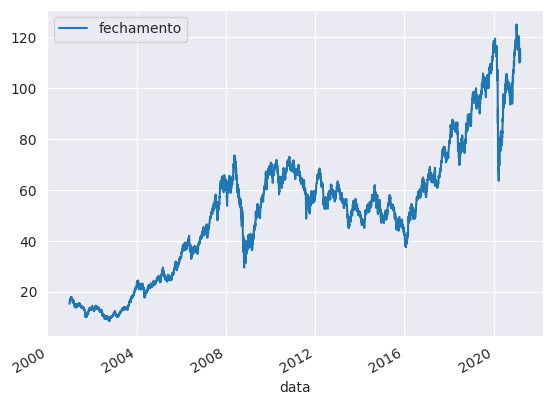

In [78]:
df.plot(x='data', y='fechamento')

In [79]:
y1= df.loc[(df.data >= '2008-05-01') & (df.data <= '2011-12-01') ]

<Axes: xlabel='data'>

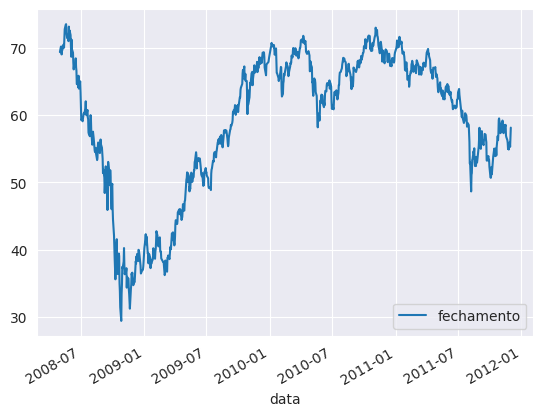

In [80]:
y1.plot(x='data', y='fechamento')

In [81]:
y2 = y1= df.loc[(df.data >= '2015-11-01') & (df.data <= '2016-12-01') ]

<Axes: xlabel='data'>

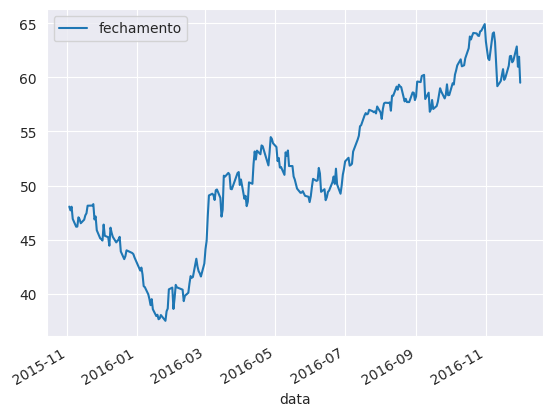

In [82]:
y2.plot(x='data', y='fechamento')

In [83]:
y3 = y1= df.loc[(df.data >= '2019-12-01') & (df.data <= '2021-12-01') ]

<Axes: xlabel='data'>

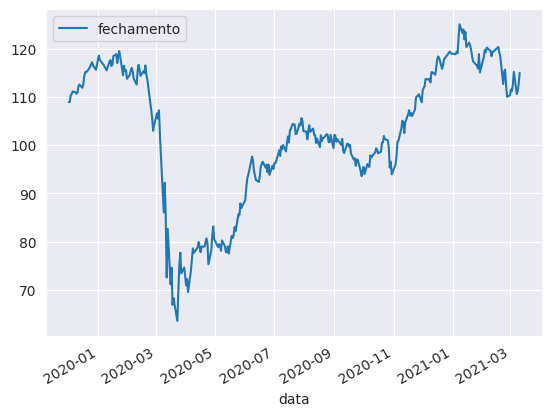

In [84]:
y3.plot(x='data', y='fechamento')

Conseguimos ver com esses Graficos os 3 peridos que tem instabilidade nos dados o 1° que Bush saiu da Presidencia dos Estados Unidos, no 2° grafico o ocorrido foi o Impeachment da então Presidente Dilma Rousseff e o 3° foi a COVID-19, Por conta disso o periodo que escolhemos para verificar foi 2017,18 e 19

#Preparando para o Decompose

In [112]:
#Pegando 14 dias para fazer o decompose e ver o resultado
df_filt= df.loc[(df.data > '2017-01-01') & (df.data < "2020-01-01")]

In [86]:
df_2= df.loc[(df.data > '2018-01-01') & (df.data < "2019-01-01")]
df_2.set_index('data', drop=True, inplace=True)

In [107]:
df_filt

,data,fechamento,abertura,max,min,vol,var
295,2019-12-30,115.645,116.530,117.086,115.599,"3,67M","-0,76%"
296,2019-12-27,116.534,117.205,117.803,115.995,"3,91M","-0,57%"
297,2019-12-26,117.203,115.864,117.220,115.673,"3,79M","1,16%"
298,2019-12-23,115.863,115.119,115.863,114.964,"4,00M","0,64%"
299,2019-12-20,115.121,115.133,115.171,114.526,"6,89M","-0,01%"
...,...,...,...,...,...,...,...
1029,2017-01-06,61.665,62.072,62.072,61.396,"2,45M","-0,65%"
1030,2017-01-05,62.071,61.594,62.409,61.594,"3,42M","0,78%"
1031,2017-01-04,61.589,61.811,61.940,61.302,"2,93M","-0,36%"
1032,2017-01-03,61.814,59.631,61.815,59.631,"3,43M","3,73%"


In [113]:
df_1=df_filt.set_index('data',drop=True)

df_1

,fechamento,abertura,max,min,vol,var
data,,,,,,
2019-12-30,115.645,116.530,117.086,115.599,"3,67M","-0,76%"
2019-12-27,116.534,117.205,117.803,115.995,"3,91M","-0,57%"
2019-12-26,117.203,115.864,117.220,115.673,"3,79M","1,16%"
2019-12-23,115.863,115.119,115.863,114.964,"4,00M","0,64%"
2019-12-20,115.121,115.133,115.171,114.526,"6,89M","-0,01%"
...,...,...,...,...,...,...
2017-01-06,61.665,62.072,62.072,61.396,"2,45M","-0,65%"
2017-01-05,62.071,61.594,62.409,61.594,"3,42M","0,78%"
2017-01-04,61.589,61.811,61.940,61.302,"2,93M","-0,36%"


In [89]:
deco = seasonal_decompose(df_1["fechamento"], period= 5)

In [90]:
deco_2 = seasonal_decompose(df_2["fechamento"], period= 5)

<Axes: xlabel='data'>

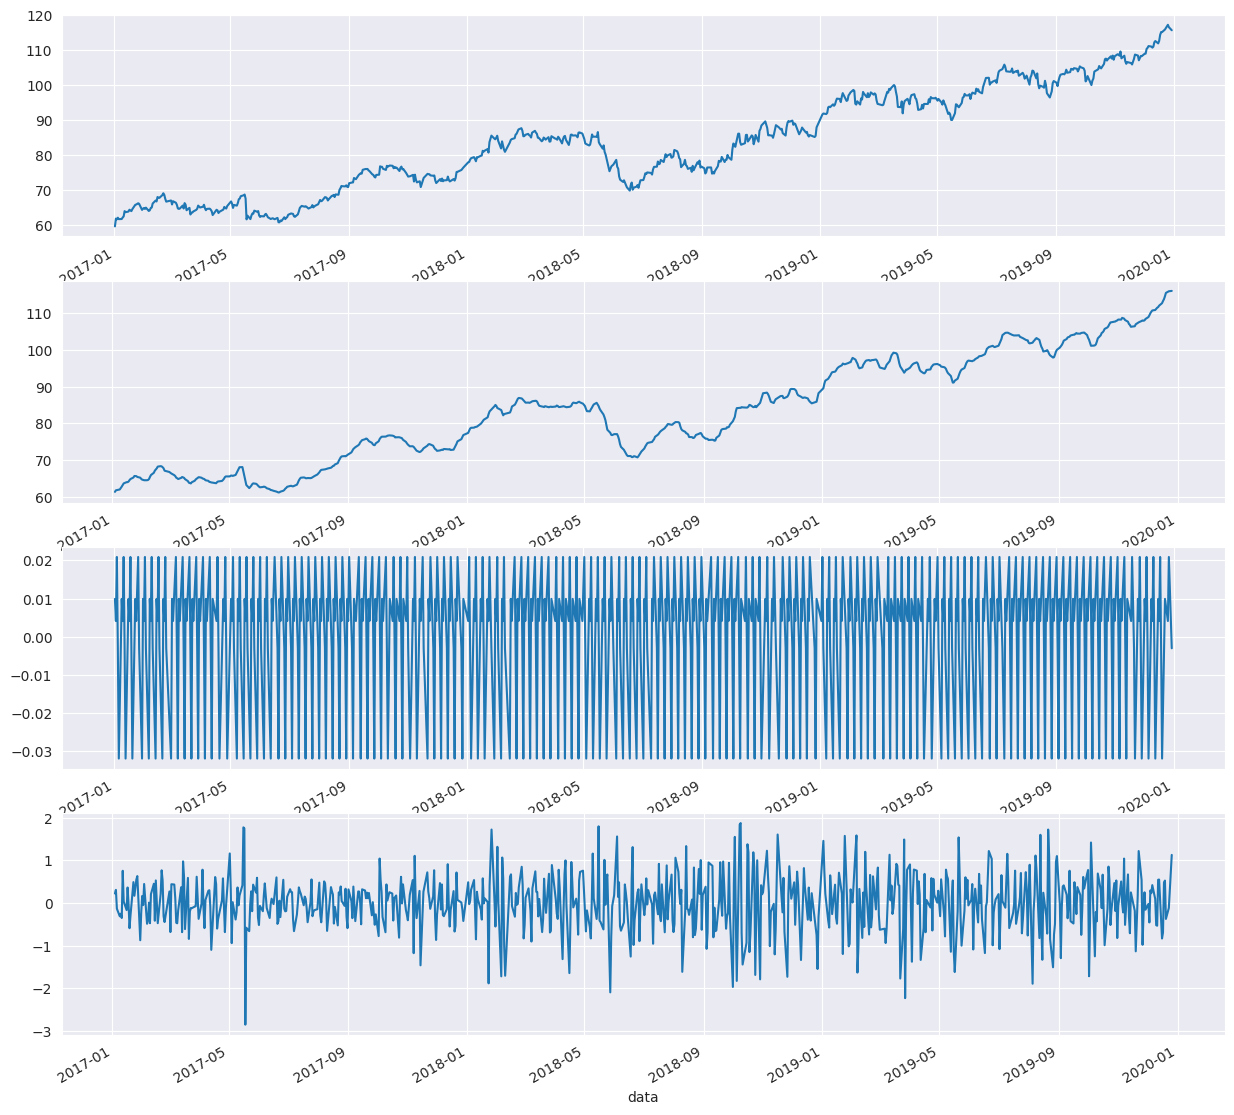

In [91]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,15))

deco.observed.plot(ax=ax1)
deco.trend.plot(ax=ax2)
deco.seasonal.plot(ax=ax3)
deco.resid.plot(ax=ax4)

<Axes: xlabel='data'>

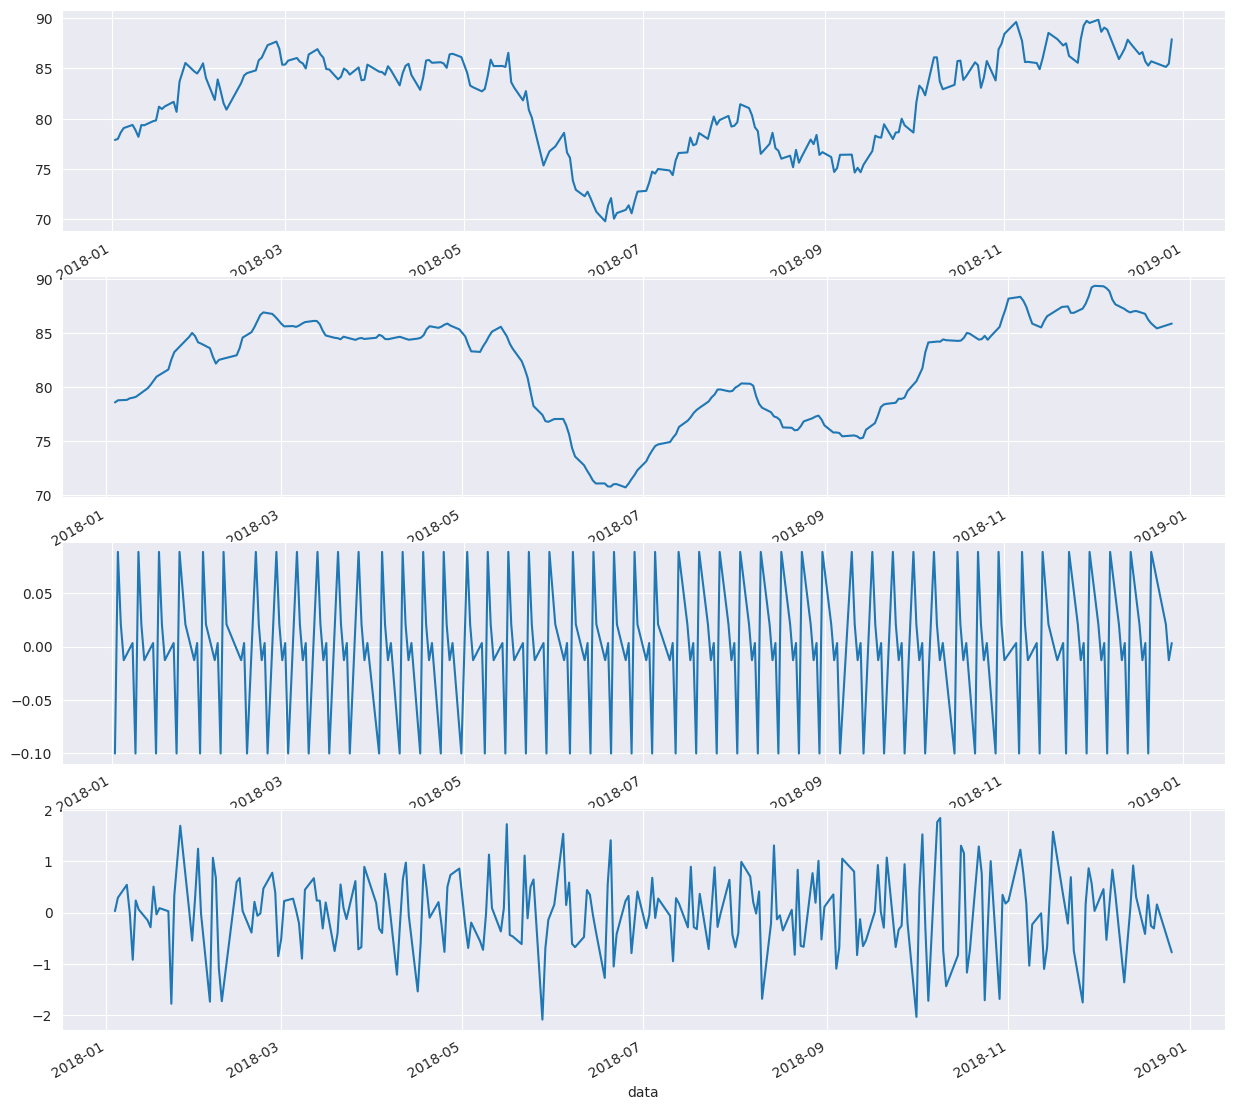

In [92]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,15))

deco_2.observed.plot(ax=ax1)
deco_2.trend.plot(ax=ax2)
deco_2.seasonal.plot(ax=ax3)
deco_2.resid.plot(ax=ax4)

Como podemos ver até mesmo nos graficos Plotados na área de analise de dados, a tendencia dos dados é subir, sobre a sazonalidade tem bastante ocilações repitidadas ao longo do tempo.

#Deixando os dados Estacionários

In [93]:
sns.set_style("darkgrid")

In [111]:
df_filt

,fechamento,abertura,max,min,vol,var
data,,,,,,
2019-12-30,115.645,116.530,117.086,115.599,"3,67M","-0,76%"
2019-12-27,116.534,117.205,117.803,115.995,"3,91M","-0,57%"
2019-12-26,117.203,115.864,117.220,115.673,"3,79M","1,16%"
2019-12-23,115.863,115.119,115.863,114.964,"4,00M","0,64%"
2019-12-20,115.121,115.133,115.171,114.526,"6,89M","-0,01%"
...,...,...,...,...,...,...
2017-01-06,61.665,62.072,62.072,61.396,"2,45M","-0,65%"
2017-01-05,62.071,61.594,62.409,61.594,"3,42M","0,78%"
2017-01-04,61.589,61.811,61.940,61.302,"2,93M","-0,36%"


In [115]:
df_3 = df_filt[['data','fechamento']]
df_3.set_index('data', drop=True, inplace=True)

In [116]:
X = df_3.fechamento.values


result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatistico: {result[0]}")
print(f"P-Value: {result[1]}")
print(f"Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}:{value}")

Teste ADF
Teste Estatistico: -1.3553987347835337
P-Value: 0.6034620797694565
Valores críticos:
	1%:-3.4393273074073045
	5%:-2.8655019247555154
	10%:-2.568879771109793


In [117]:
df_3.head()

,fechamento
data,
2019-12-30,115.645
2019-12-27,116.534
2019-12-26,117.203
2019-12-23,115.863
2019-12-20,115.121


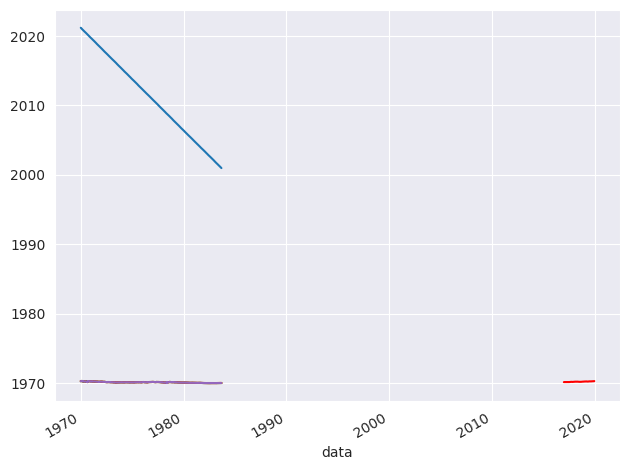

In [118]:
ma = df_3.rolling(5).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

**Observação:**
Aqui podemos ver que fica dificil tirar uma conclusão dos dados plotados, depois de tirar a média

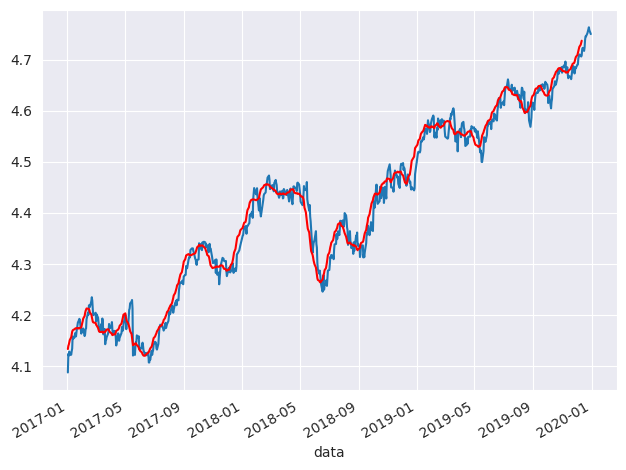

In [119]:
#Fazendo o Log no Dataframe
df_log = np.log(df_3)
#Aplicando a média
ma_log = df_log.rolling(12).mean()
#plotando a visualização sendo os dados em azul e a média em vermelho
f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

**Observação 2:**
Ja aqui conseguimos observar melhor o gráfico depois da tranformação dos dados, e podemos observar isso até mesmo vendo o indice do eixo y do gráfico

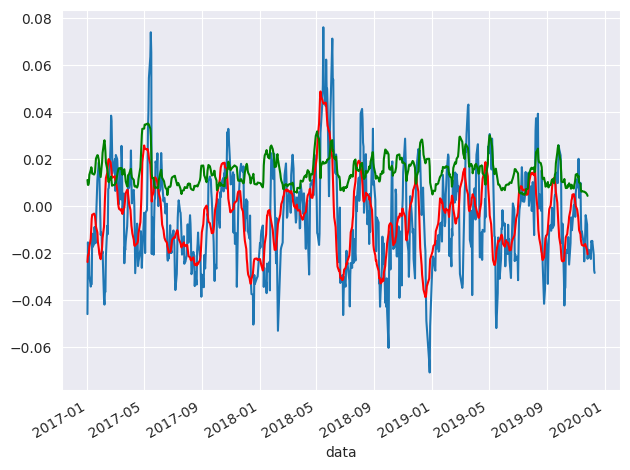

In [120]:
#Subtraindo a Média móvel e dropando os nulos
df_s = (df_log - ma_log).dropna()
#calculando a média
ma_s = df_s.rolling(12).mean()
# Desvio Padrão - para analisar o comportamento
std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color="r")
std.plot(ax=ax, legend=False, color="g")
plt.tight_layout()

**Obserção:**
Agora com esse plot, diferente dos outros conseguimos observar que ele ficou mais na horizontal, parece uma constancia maior com uma ocilação de quase -0.07 até próximo de 0.08 dos **dados**, depois da tranformação logaritima.

In [130]:
X_s = df_s.fechamento.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatistico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print(f"Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}:{value}")

Teste ADF
Teste Estatistico: -6.908124093732556
P-Value: 1.2321284304534573e-09
Valores críticos:
	1%:-3.439464954327953
	5%:-2.8655625802683473
	10%:-2.5689120852623457


**Obserção:**
Aqui podemos ver uma grande diferença entre meu primeiro adfuller e esse aqui, podemos observar que o nosso p-valor se aproximou mais de 0 e falar que está "estacionária", para podemos ir além usando a diferenciação

Teste ADF
Teste Estatístico: -12.339222396703867
P-Value: 6.172722472651178e-23
Valores críticos:
	1%: -3.439516060164992
	5%: -2.8655850998755263
	10%: -2.5689240826597173


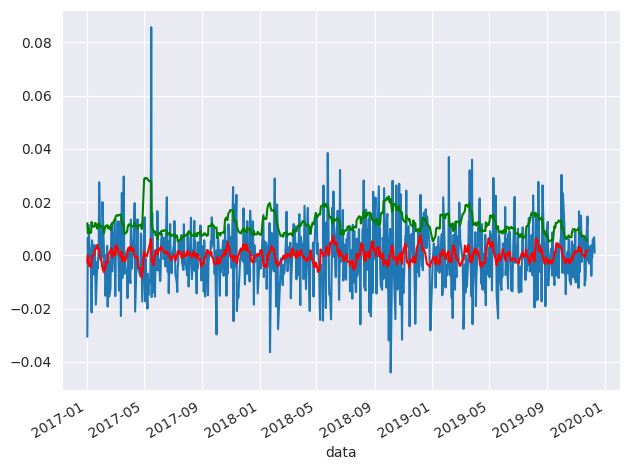

In [131]:
#aplicando a diferenciação no nosso dataframe
df_diff = df_s.diff(1) # primeira diferenciação
ma_diff = df_diff.rolling(12).mean() #média

std_diff = df_diff.rolling(12).std()#desvio padrão


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()
#Teste de ADFULLER
X_diff = df_diff.fechamento.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

**Obserção:**
Agora podemos ver uma maior aproximação do 0, aonde antes tinhamso nosso p-value e-09, agora temos ele e-23, logo mais próxima a 0, logo mais "estacionária"

#Autocorrelação e Autocorrelação parcial

In [137]:
#Pegando nosso df_diff aonde aplicamos a difereciação e fazendo a autocorrelação e a autocorrelação parcial, com numero de lags iguala 5, pois nossos dados são de 5 em 5 dias
lag_acf = acf(df_diff.dropna(), nlags= 5)
lag_pacf = pacf(df_diff.dropna(), nlags=5)

In [ ]:
#cola da aula para entender a conta

#5% ACF

# 1.96/sqrt(N-d) -> N - número de pojntos do df e d é o número de vezes que nós diferenciamos o df

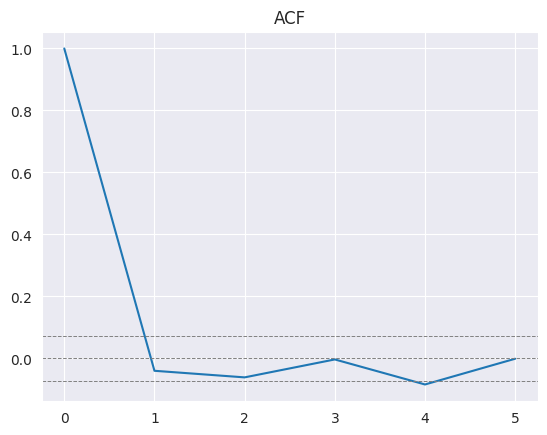

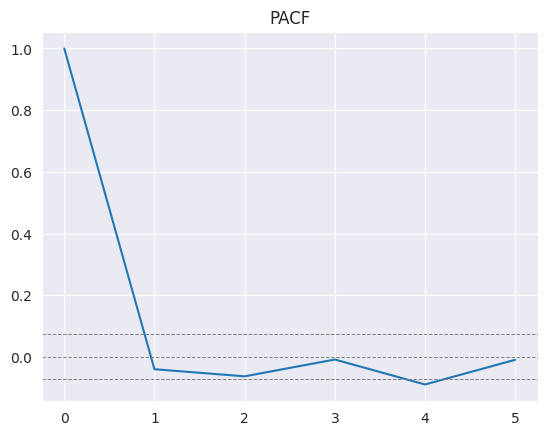

In [138]:
#ACF
plt.plot(lag_acf)
#calculando nossas linhas de ponto critico a o numero de vezes que diferenciamos o nosso dataframe que foi 1. Lembrando que modificamos ele mais vezes, mas a diferenciação foi feita 1 vez
plt.axhline(y= -1.96/(np.sqrt((len(df_diff)-1))), linestyle="--", color="grey", linewidth=0.7)
plt.axhline(y=0, linestyle="--", color="grey", linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff)-1))), linestyle="--", color="grey", linewidth=0.7)

plt.title("ACF")
plt.show()

#PACF
plt.plot(lag_pacf)
#calculando novamente as linhas de ponto critico
plt.axhline(y= -1.96/(np.sqrt((len(df_diff)-1))), linestyle="--", color="grey", linewidth=0.7)
plt.axhline(y=0, linestyle="--", color="grey", linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff)-1))), linestyle="--", color="grey", linewidth=0.7)

plt.title("PACF")
plt.show()

Conseguimos ver que nosso x aqui no modelo ARMIA seria mais ou menos em 0.9 evndo ACF. O y vamos ver no PACF aonde seria no mesmo lugar (0.9).

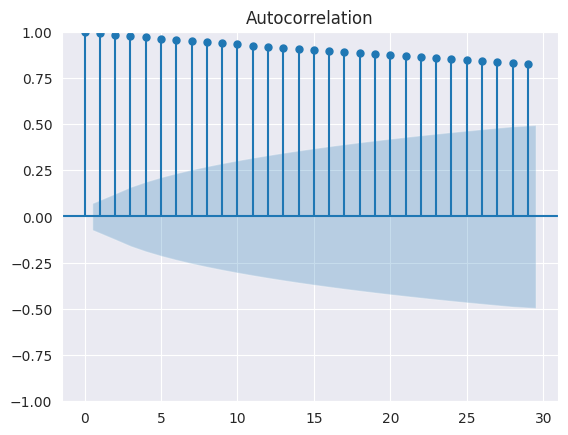

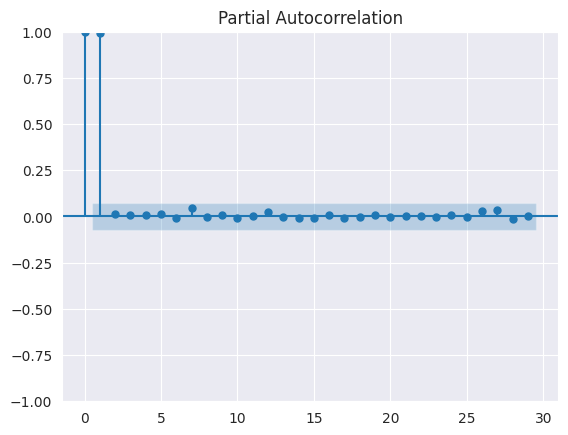

In [125]:
plot_acf(df_3)
plot_pacf(df_3)
plt.show()

CONCLUSÃO:Decorrente a análise, por conta dos nossos dados serem dinamicos, faz com que minha tendencia varie em relação a outra função pediodia, logo não faz sentido fazer a transformçao dos nossos dados em estacionário

#Fazendo os modelos

In [178]:
data =df.loc[(df.data > '2017-01-01') & (df.data < "2020-01-01")]

In [179]:
data.index = data.data
data.head()

,data,fechamento,abertura,max,min,vol,var
data,,,,,,,
2019-12-30,2019-12-30,115.645,116.530,117.086,115.599,"3,67M","-0,76%"
2019-12-27,2019-12-27,116.534,117.205,117.803,115.995,"3,91M","-0,57%"
2019-12-26,2019-12-26,117.203,115.864,117.220,115.673,"3,79M","1,16%"
2019-12-23,2019-12-23,115.863,115.119,115.863,114.964,"4,00M","0,64%"
2019-12-20,2019-12-20,115.121,115.133,115.171,114.526,"6,89M","-0,01%"


In [180]:
data = data[["data","fechamento"]]

In [181]:
data["unique_id"] = "ibovespa"

In [182]:
data = data.rename(columns={"data":"ds", "fechamento":"y"})

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2019-12-30 to 2017-01-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y          739 non-null    float64
 1   unique_id  739 non-null    object 
dtypes: float64(1), object(1)
memory usage: 17.3+ KB


In [193]:
treino = data.loc[(data["ds"] > "2018-09-01") & (data["ds"] < "2019-01-01")]
valid = data.loc[(data["ds"] >= "2019-01-01") & (data["ds"] <= "2019-02-01")]

h = valid['ds'].nunique()

In [184]:
h

22

In [ ]:
treino

In [ ]:
valid

In [185]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

WMAPE:0.058557367123186335


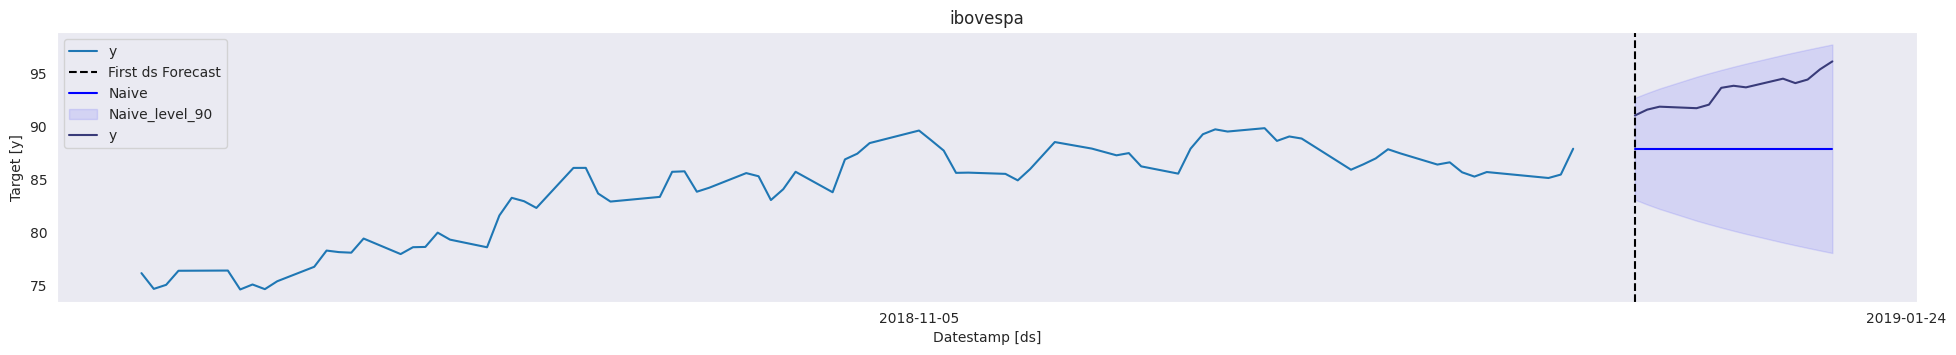

In [204]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=["ds", 'unique_id'], how='left')
forecast_df=forecast_df.dropna()
wmape1 = wmape(forecast_df['y'].values, forecast_df["Naive"].values)
print(f'WMAPE:{wmape1:.2%}')

model.plot(treino, forecast_df, level=[90], unique_ids=['ibovespa'], engine='matplotlib', max_insample_length=90)

WMAPE:7.93%


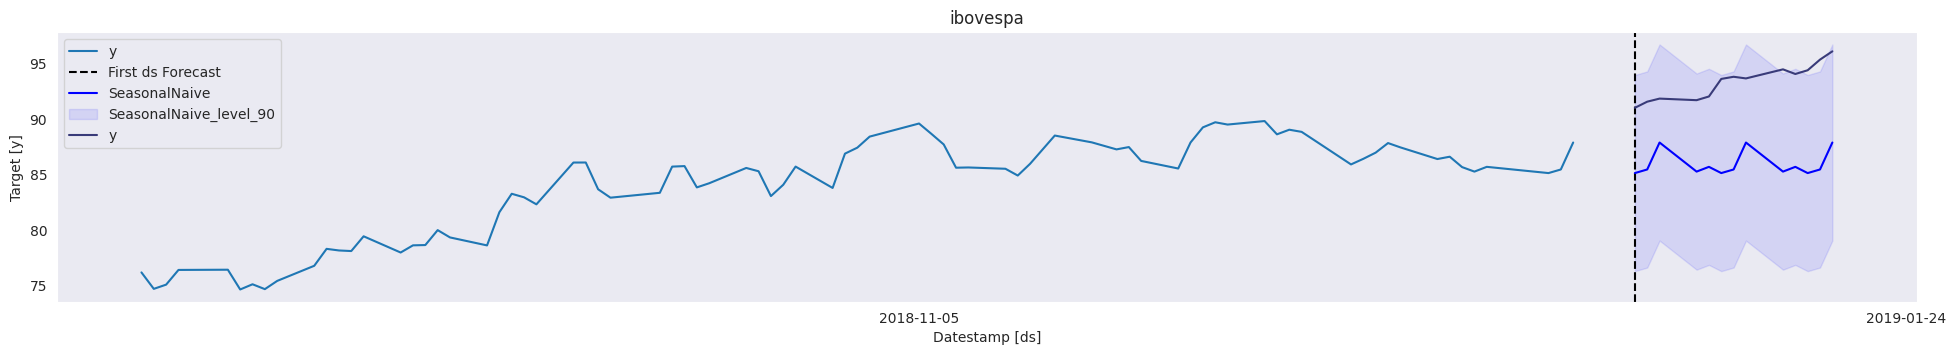

In [202]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_df_s = model_s.predict(h=h, level=[90])
forecast_df_s = forecast_df_s.reset_index().merge(valid, on=["ds", 'unique_id'], how='left')
forecast_df_s=forecast_df_s.dropna()
wmape2 = wmape(forecast_df_s['y'].values, forecast_df_s["SeasonalNaive"].values)
print(f'WMAPE:{wmape2:.2%}')

model_s.plot(treino, forecast_df_s, level=[90], unique_ids=['ibovespa'], engine='matplotlib', max_insample_length=90)

WMAPE: 6.38%


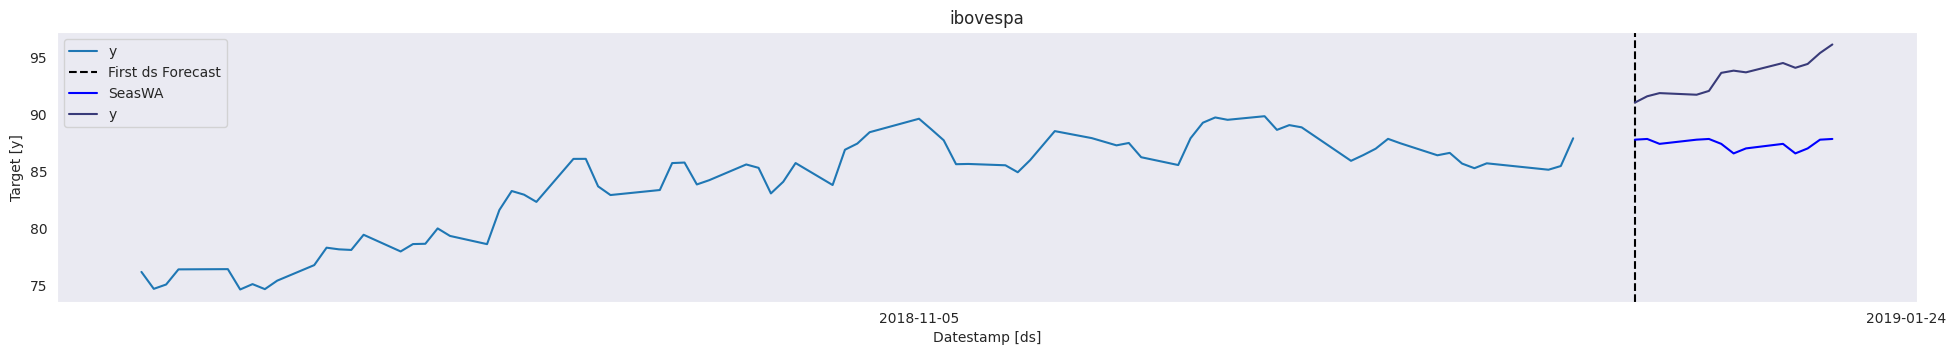

In [199]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=5, window_size=2)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h)
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfsm=forecast_dfsm.dropna()
wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids=['ibovespa'],engine ='matplotlib', max_insample_length=90)

WMAPE:5.86%


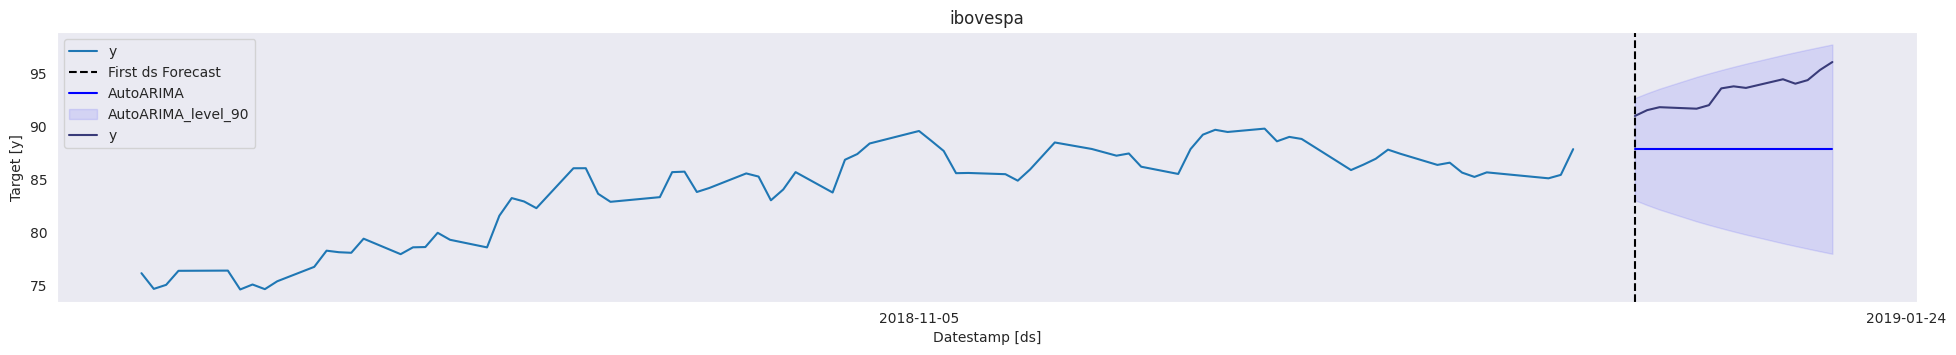

In [207]:
model_a = StatsForecast(models=[AutoARIMA(season_length=5)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_df_a = model_a.predict(h=h, level=[90])
forecast_df_a = forecast_df_a.reset_index().merge(valid, on=["ds", 'unique_id'], how='left')
forecast_df_a=forecast_df_a.dropna()
wmape4 = wmape(forecast_df_a['y'].values, forecast_df_a["AutoARIMA"].values)
print(f'WMAPE:{wmape4:.2%}')

model_a.plot(treino, forecast_df_a, level=[90], unique_ids=['ibovespa'], engine='matplotlib', max_insample_length=90)

***Conclusão***

Levando em consideração os 4 modelos se colocar eles em um rank ficaria:
1. Naive & AutoARIMA (WMAPE: 5.86%)
2. SeasonalWindowAverage (WMAPE: 6.38%)
3. SeasonalNaive (WMAPE: 7,93%)

Seguindo essas informações os modelos mais indicados são os Naive e o AutoARIMA, mas levando em consideração a demora na execução do modelo do AutoARIMA, para o dia-a-dia ficar mais rapido também o modemo escolhido é o Naive
